In [16]:
import librosa
import librosa.display
from IPython.display import Audio
import numpy as np

In [17]:
audio, sr = librosa.load(r"D:\vs_code_python\Sperctromorph_GANs\data\clean_testset_wav\p232_006.wav")
duration = librosa.get_duration(y=audio, sr=sr)

In [18]:
print(f"Sample rate = {sr} and Duration = {duration} seconds")

Sample rate = 22050 and Duration = 5.103537414965986 seconds


In [19]:
Audio(r"D:\vs_code_python\Sperctromorph_GANs\data\clean_testset_wav\p232_006.wav")

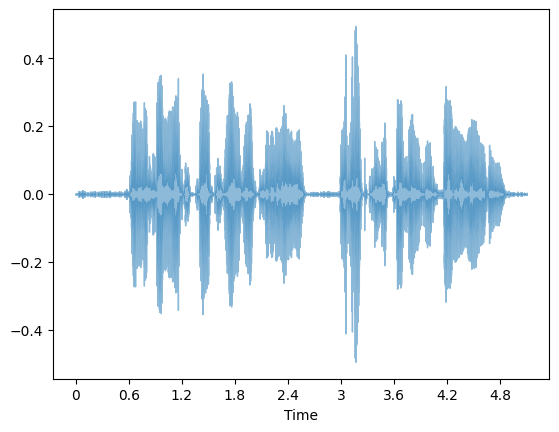

In [20]:
librosa.display.waveshow(audio, sr=sr, alpha=0.5)

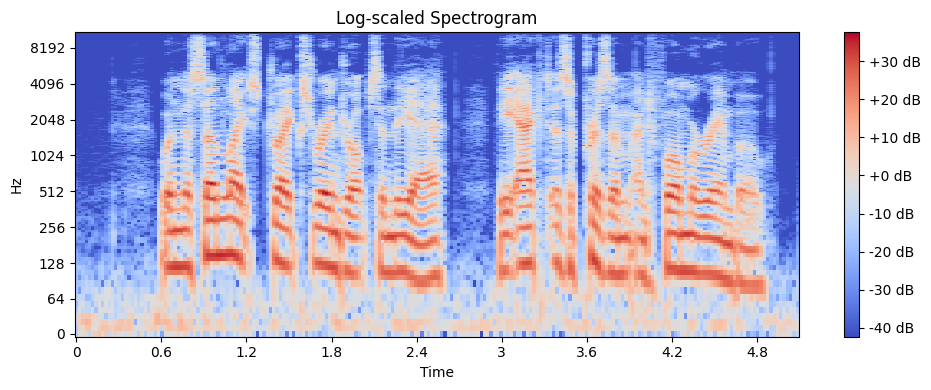

In [21]:
import matplotlib.pyplot as plt

D = librosa.stft(audio)
S_db = librosa.amplitude_to_db(abs(D))

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Log-scaled Spectrogram")
plt.tight_layout()
plt.show()


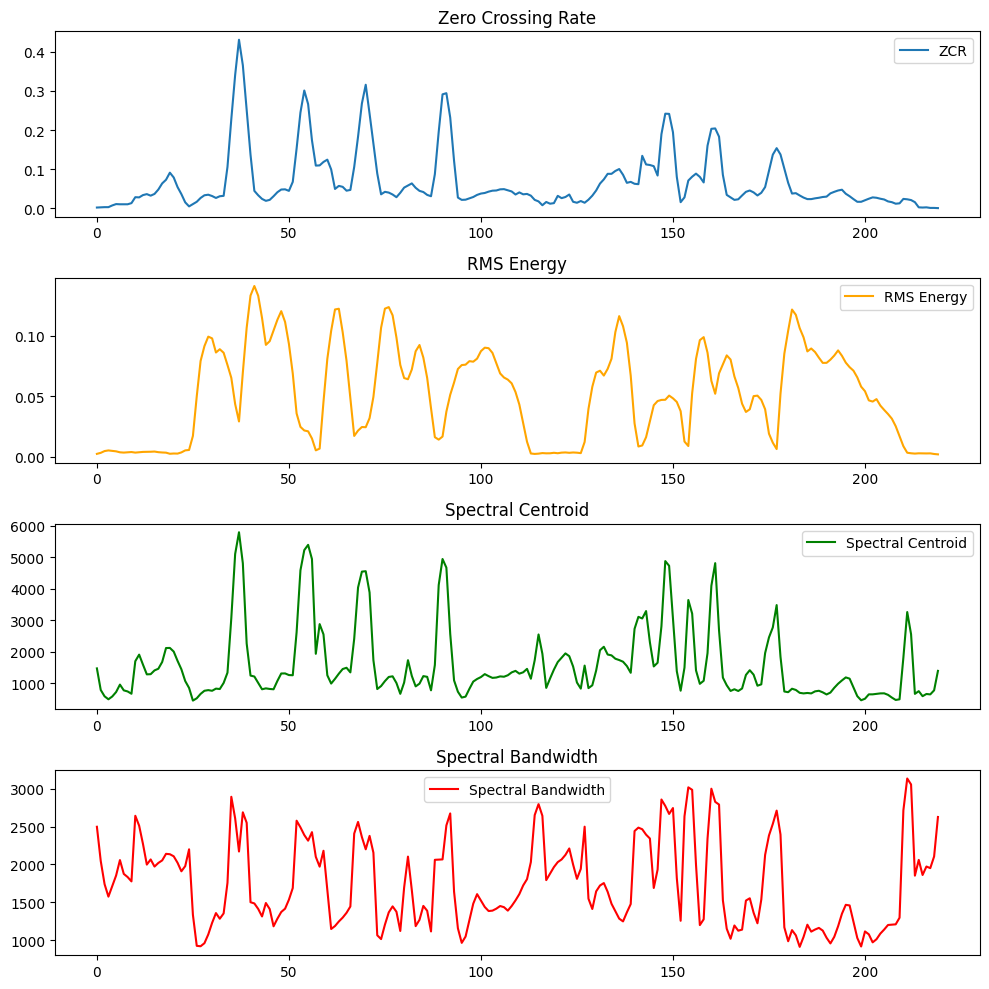

In [22]:
plt.figure(figsize=(10, 10))

plt.subplot(4,1,1)
zcr = librosa.feature.zero_crossing_rate(audio)[0]
plt.plot(zcr, label="ZCR"); plt.title("Zero Crossing Rate"); plt.legend()

plt.subplot(4,1,2)
rms = librosa.feature.rms(y=audio)[0]
plt.plot(rms, label="RMS Energy", color="orange"); plt.title("RMS Energy"); plt.legend()

plt.subplot(4,1,3)
cent = librosa.feature.spectral_centroid(y=audio, sr=sr)[0]
plt.plot(cent, label="Spectral Centroid", color="green"); plt.title("Spectral Centroid"); plt.legend()

plt.subplot(4,1,4)
bw = librosa.feature.spectral_bandwidth(y=audio, sr=sr)[0]
plt.plot(bw, label="Spectral Bandwidth", color="red"); plt.title("Spectral Bandwidth"); plt.legend()

plt.tight_layout()
plt.show()


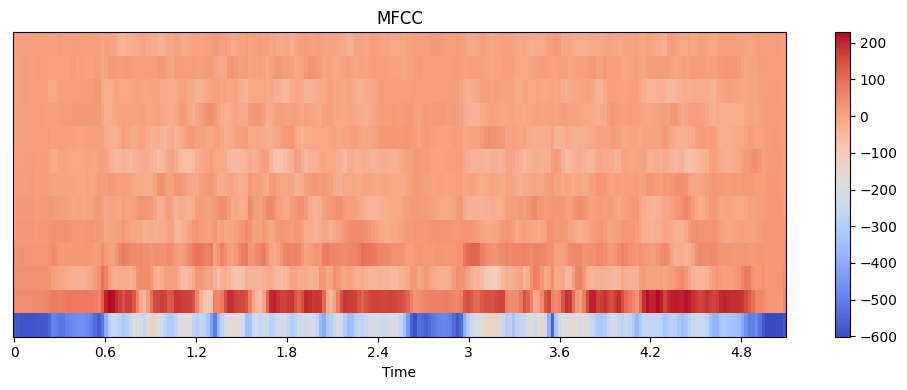

In [23]:

mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar()
plt.title("MFCC")
plt.tight_layout()
plt.show()


In [27]:

import soundfile as sf
y_stretch = librosa.effects.time_stretch(audio, rate=1.5)
y_pitch = librosa.effects.pitch_shift(audio, sr=sr, n_steps=2)

sf.write("output_modified.wav", y_pitch, sr)


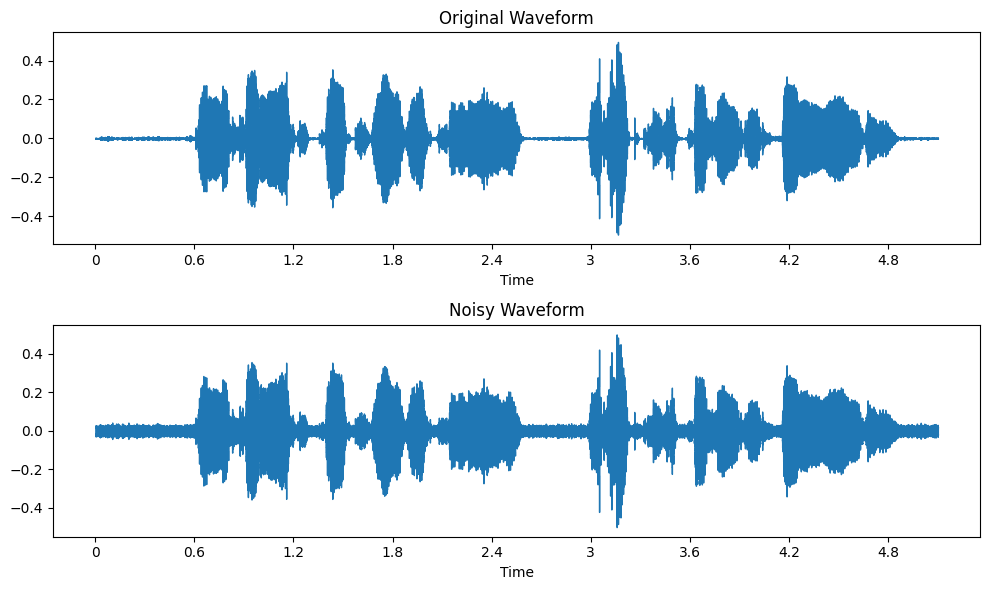

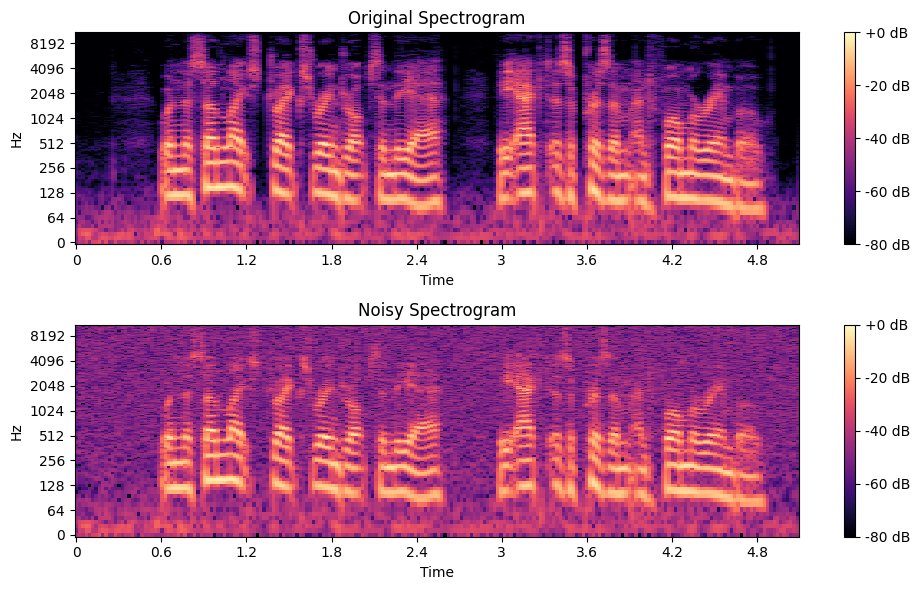

In [26]:

noise = 0.01 * np.random.randn(len(audio))
y_noisy = audio + noise

# Plot waveforms
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(audio, sr=sr)
plt.title("Original Waveform")

plt.subplot(2, 1, 2)
librosa.display.waveshow(y_noisy, sr=sr)
plt.title("Noisy Waveform")
plt.tight_layout()
plt.show()

# Plot log-scaled spectrograms
def plot_spec(y, sr, title):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format="%+2.0f dB")
    plt.title(title)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plot_spec(audio, sr, "Original Spectrogram")

plt.subplot(2, 1, 2)
plot_spec(y_noisy, sr, "Noisy Spectrogram")
plt.tight_layout()
plt.show()
